In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.chdir('D:/Datasets')

In [3]:
import pandas as pd
df = pd.read_csv('Student_Performance.csv')

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [7]:
df.shape

(10000, 6)

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
#seperate Categorical and continous features
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [10]:
def catconsep(df):
    cat = list(df.columns[df.dtypes=='object'])
    con = list(df.columns[df.dtypes!='object'])
    return cat,con

In [11]:
cat,con = catconsep(df)
cat

['Extracurricular Activities']

In [12]:
con

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

## Visualization using matplotlib and seaborn

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

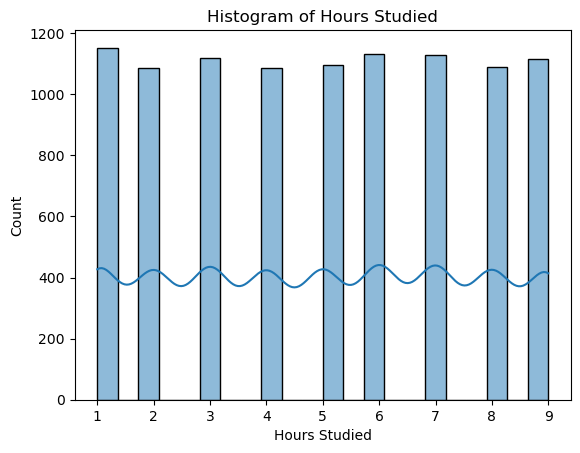

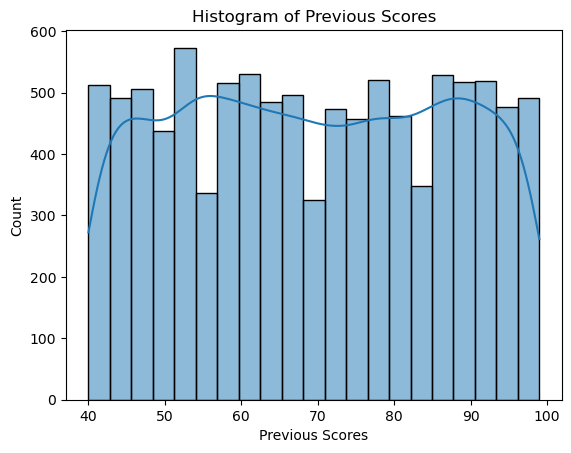

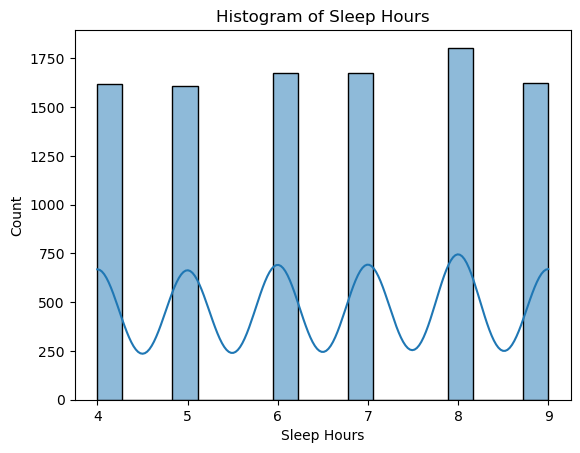

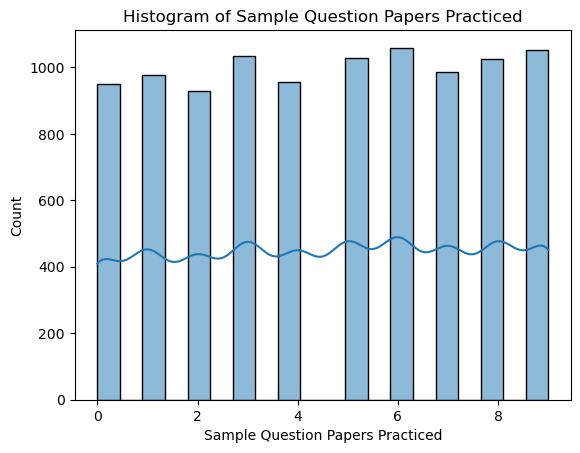

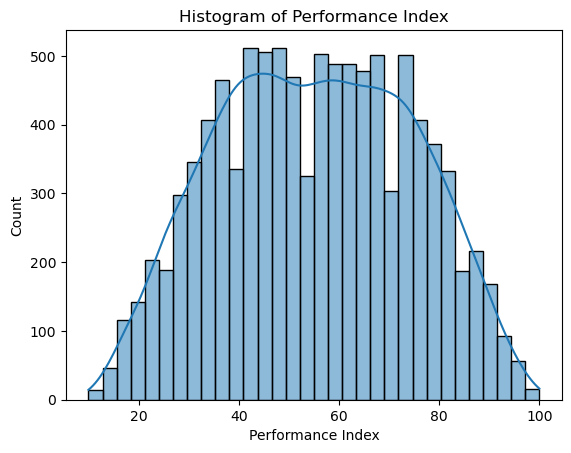

In [14]:
# univariate Analysis for continous features draw Histogram
for i in con:
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram of {i}')
    plt.show()
    

<Axes: ylabel='Extracurricular Activities'>

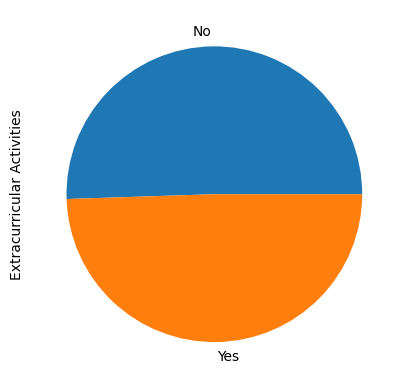

In [15]:
# for continous features lets draw pie chart
df['Extracurricular Activities'].value_counts().plot(kind = 'pie')

<Axes: >

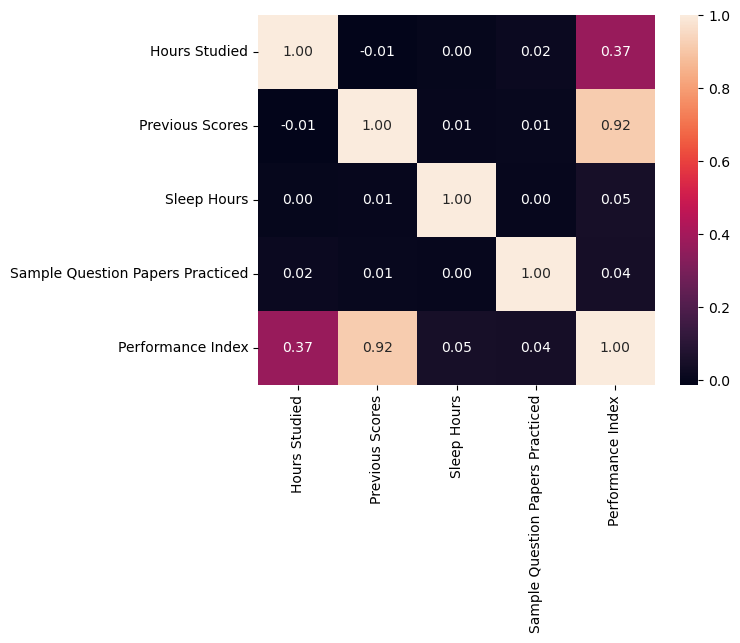

In [16]:
# correlation heatmap for continous Variables
sns.heatmap(df.corr(),annot= True, fmt ='.2f')

## Target Variable: Performance Index
* Bivariate Analysis
1. cat vs con : Boxplot
2. cat vs cat : Crosstab
3. con vs con : Scatterplot

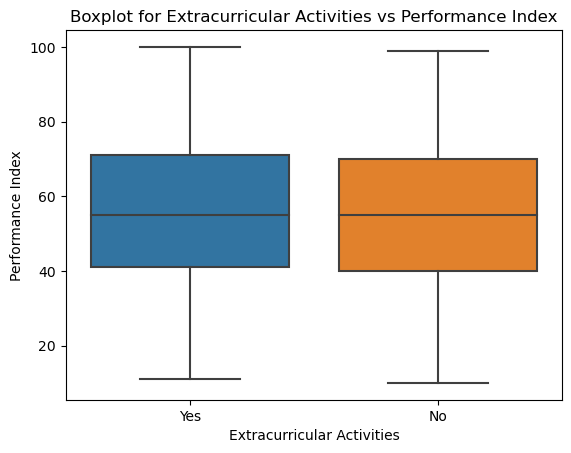

In [17]:
    #1.Cat Vs. Con : Drawing Boxplot for Performance Index vs extra curricular activities
    sns.boxplot(data=df,x=df['Extracurricular Activities'], y= df['Performance Index'])
    plt.xlabel = ('Extracurricular Activities')
    plt.ylabel = ('Performance Index')
    plt.title('Boxplot for Extracurricular Activities vs Performance Index')
    plt.show()

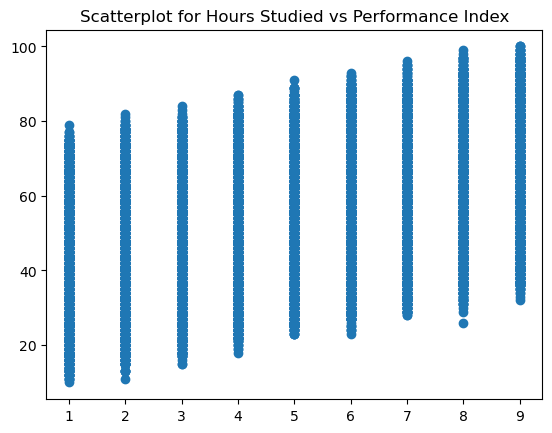

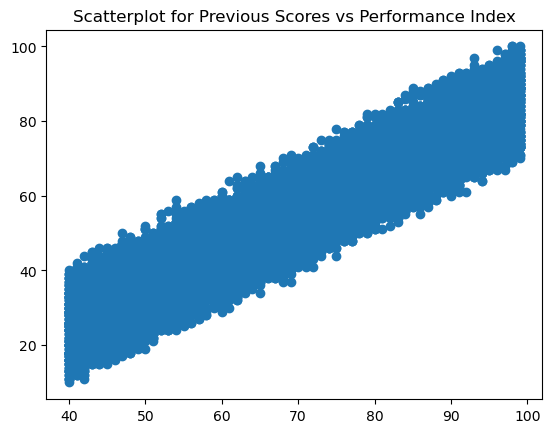

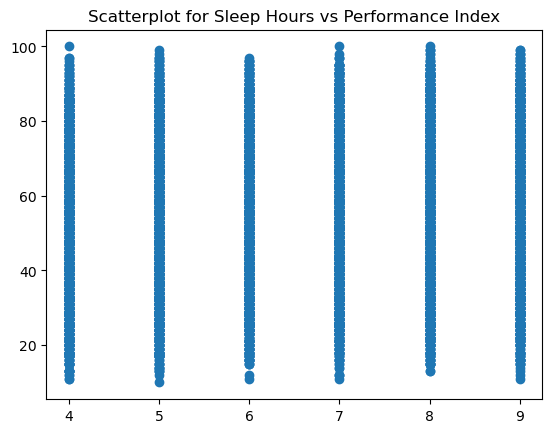

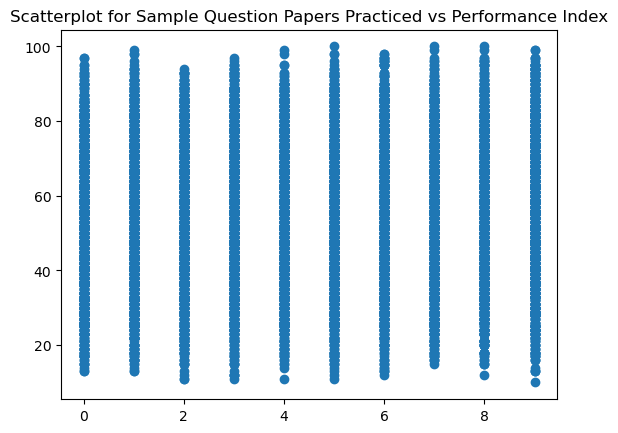

In [18]:
for i in con:
    if i!='Performance Index':
        plt.scatter(df[i],df['Performance Index'])
        plt.title(f'Scatterplot for {i} vs Performance Index')
        plt.show()

#### from above graphs we see linear relationship between prev scores and Performance Index

## Multivariate Analysis
* Pairplot

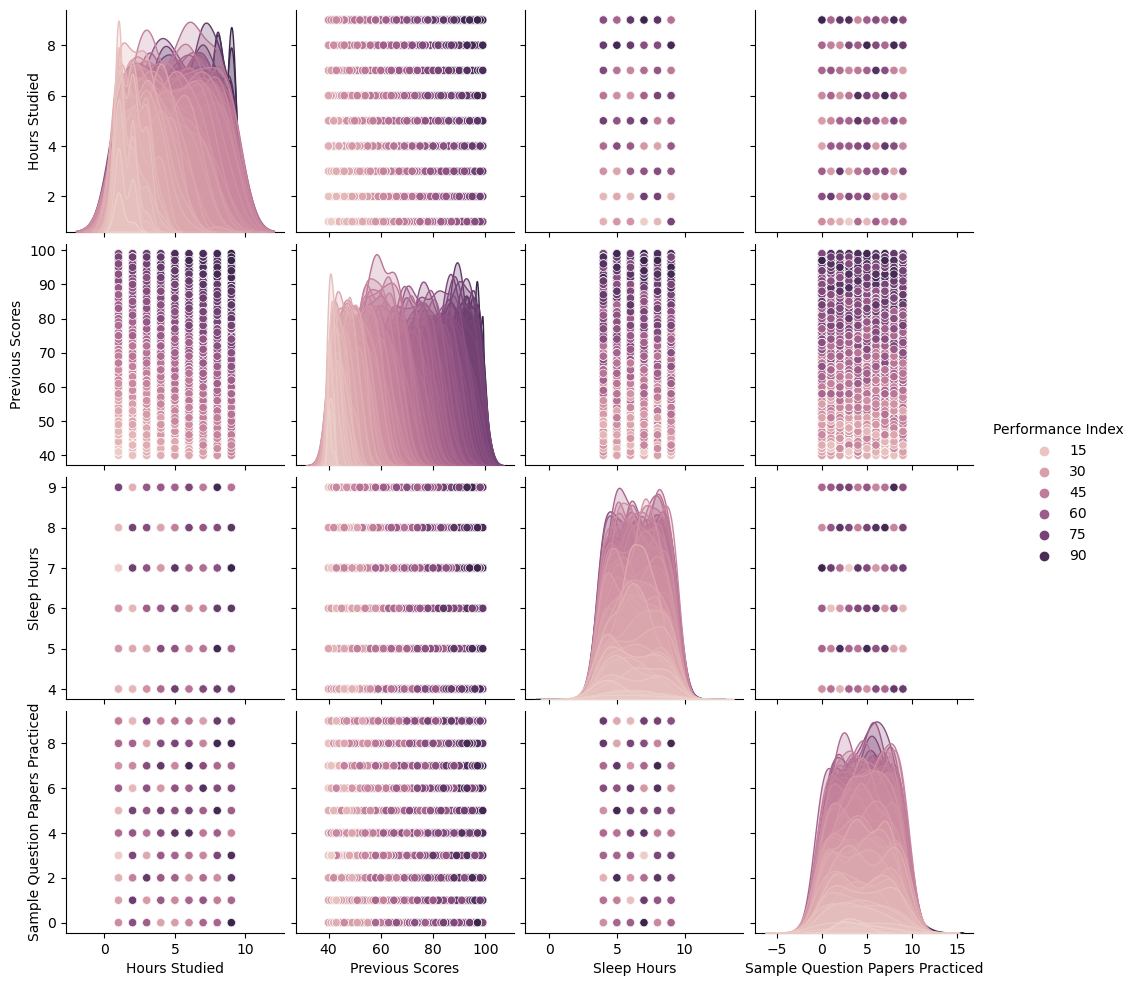

In [19]:
sns.pairplot(data=df,hue='Performance Index')
plt.show()

In [20]:
# Seperate Performance index as Y feature
X = df.drop(labels=['Performance Index'],axis=1)
Y = df[['Performance Index']]

In [21]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


In [22]:
Y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [23]:
cat1,con1 = catconsep(X)
cat1

['Extracurricular Activities']

In [24]:
con1

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced']

## Build Pipeline to train the model

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [26]:
num_pipe = Pipeline(steps=[('SimpleImputer',SimpleImputer(strategy='mean')),
                           ('Scaler',StandardScaler())])
cat_pipe = Pipeline(steps = [('SimpleImputer', SimpleImputer(strategy='most_frequent')),
                             ('OHE',OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('num',num_pipe,con1),
                        ('cat',cat_pipe,cat1)])

In [27]:
X_pre = pre.fit_transform(X)

In [28]:
X_pre

array([[ 0.77518771,  1.70417565,  1.45620461, -1.24975394,  0.        ,
         1.        ],
       [-0.38348058,  0.72391268, -1.49229423, -0.90098215,  1.        ,
         0.        ],
       [ 1.16141048, -1.06362569,  0.27680507, -0.90098215,  0.        ,
         1.        ],
       ...,
       [ 0.38896495,  0.7815752 ,  0.86650484,  0.1453332 ,  0.        ,
         1.        ],
       [ 1.54763324,  1.5888506 ,  0.27680507, -1.59852572,  0.        ,
         1.        ],
       [ 0.77518771,  0.26261245,  0.86650484, -1.24975394,  1.        ,
         0.        ]])

In [29]:
cols = pre.get_feature_names_out()

In [30]:
cols

array(['num__Hours Studied', 'num__Previous Scores', 'num__Sleep Hours',
       'num__Sample Question Papers Practiced',
       'cat__Extracurricular Activities_No',
       'cat__Extracurricular Activities_Yes'], dtype=object)

In [31]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Hours Studied,num__Previous Scores,num__Sleep Hours,num__Sample Question Papers Practiced,cat__Extracurricular Activities_No,cat__Extracurricular Activities_Yes
0,0.775188,1.704176,1.456205,-1.249754,0.0,1.0
1,-0.383481,0.723913,-1.492294,-0.900982,1.0,0.0
2,1.161410,-1.063626,0.276805,-0.900982,0.0,1.0
3,0.002742,-1.005963,-0.902594,-0.900982,0.0,1.0
4,0.775188,0.320275,0.866505,0.145333,1.0,0.0


In [32]:
X_pre.shape

(10000, 6)

## Train-test Split

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [34]:
xtrain.shape

(8000, 6)

In [35]:
xtest.shape

(2000, 6)

In [36]:
ytrain.shape

(8000, 1)

In [37]:
ytrain.head()

,Performance Index
5504,59.0
5307,49.0
1684,47.0
2441,74.0
0,91.0


## Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [39]:
model.score(xtrain,ytrain)

0.988716967469377

In [40]:
model.score(xtest,ytest)

0.9888763071047979

In [41]:
#evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def model_evaluation(xtrain,ytrain,xtest,ytest,model):
    
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    
    tr_mae = mean_absolute_error(ytrain,ypred_tr)
    tr_mse = mean_squared_error(ytrain,ypred_tr)
    tr_rmse = tr_mse**(1/2)
    tr_r2 = r2_score(ytrain,ypred_tr)
    
    ts_mae = mean_absolute_error(ytest,ypred_ts)
    ts_mse = mean_squared_error(ytest,ypred_ts)
    ts_rmse = ts_mse**(1/2)
    ts_r2 = r2_score(ytest,ypred_ts)
    
    print('Training Model Evaluation\n')
    print(f"Mean Absolute Error: {tr_mae:.2f}")
    print(f"Mean Squared Error: {tr_mse:.2f}")
    print(f"Root Mean Squared Error: {tr_rmse:.2f}")
    print(f"R2 Score: {tr_r2:.4f}")
    print ('----------------------------------')
    print('\nTesting Model Evaluation\n')
    print(f"Mean Absolute Error: {ts_mae:.2f}")
    print(f"Mean Squared Error: {ts_mse:.2f}")
    print(f"Root Mean Squared Error: {ts_rmse:.2f}")
    print(f"R2 Score: {ts_r2:.4f}")
    
    
    

In [42]:
model_evaluation(xtrain,ytrain,xtest,ytest,model)

Training Model Evaluation

Mean Absolute Error: 1.61
Mean Squared Error: 4.14
Root Mean Squared Error: 2.04
R2 Score: 0.9887
----------------------------------

Testing Model Evaluation

Mean Absolute Error: 1.63
Mean Squared Error: 4.19
Root Mean Squared Error: 2.05
R2 Score: 0.9889


In [43]:
preds = model.predict(X_pre)
preds

array([[91.83819082],
       [63.14944511],
       [45.06345302],
       ...,
       [72.99376373],
       [94.34723207],
       [65.29906084]])

In [44]:
df['Predicted Performance Index'] = preds

In [45]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predicted Performance Index
0,7,99,Yes,9,1,91.0,91.838191
1,4,82,No,4,2,65.0,63.149445
2,8,51,Yes,7,2,45.0,45.063453
3,5,52,Yes,5,2,36.0,36.560589
4,7,75,No,8,5,66.0,67.091912


In [46]:
ytest.head()

,Performance Index
3644,78.0
1828,46.0
6661,35.0
9216,71.0
5911,37.0


In [47]:
df1 =df[['Performance Index']]
df1

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [48]:
df1['Predcited Performance Index'] = preds
df1

,Performance Index,Predcited Performance Index
0,91.0,91.838191
1,65.0,63.149445
2,45.0,45.063453
3,36.0,36.560589
4,66.0,67.091912
...,...,...
9995,23.0,21.617251
9996,58.0,56.507106
9997,74.0,72.993764
9998,95.0,94.347232


In [49]:
print(model.coef_)

[[ 7.38387775 17.65123244  0.81839411  0.55554694 -0.305578    0.305578  ]]
